### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
#
# Let us find out the number of missing values in each column
# and also compare with other groups in same column
for c in data.columns:
    nan_count = data[c].isnull().sum()
    if nan_count >0:
        print(f"Column {c} has {nan_count} NaN")
        print(data[c].value_counts())
        print()

Column car has 12576 NaN
car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

Column Bar has 107 NaN
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

Column CoffeeHouse has 217 NaN
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

Column CarryAway has 151 NaN
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

Column RestaurantLessThan20 has 130 NaN
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

Column Restaurant20To50 has 189 NaN
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64



3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# The column 'car' has the highest number of missing values. The values in this column does not provide much value and 
# also less significant in driver's decision making
#
# Overall number of missing values does not make much difference. So I decided to fill missing values with "Unknown"
data.fillna("Unknown", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [17]:
# The value counts in column Y provide number of acceptances.
total_acceptance = data["Y"].value_counts()[1]
total_observations = data.shape[0]
total_acceptance/total_observations
#
# 57% drivers choose to accept coupons

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='count', ylabel='coupon'>

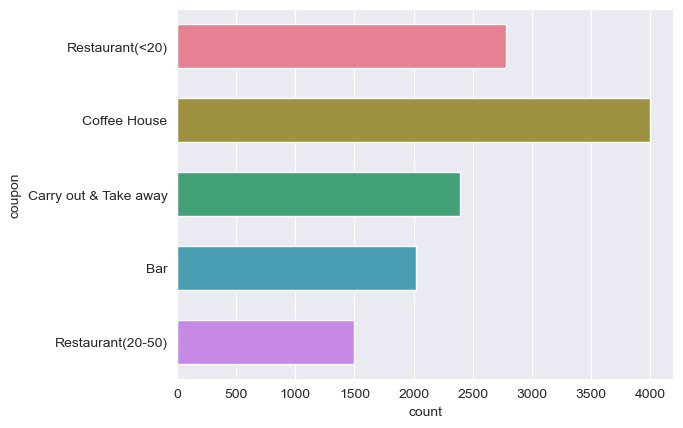

In [18]:
sns.set_style('darkgrid')
sns.countplot(data=data, y='coupon',  palette ='husl',width=0.6)

6. Use a histogram to visualize the temperature column.

C:\Users\mdsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

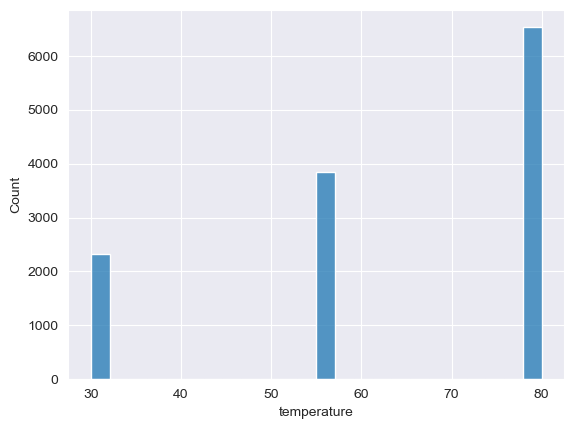

In [19]:
sns.histplot(data=data, x='temperature')

C:\Users\mdsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bar', ylabel='Count'>

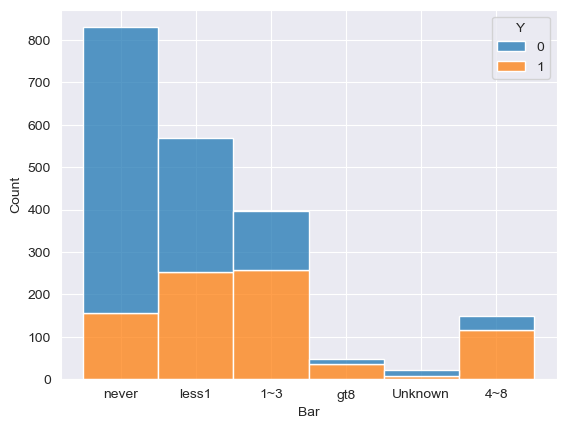

In [25]:
#
# Let us see acceptance of drivers who went to bar before  
sns.histplot(data.query('coupon=="Bar"'), x='Bar', hue='Y', multiple="stack")

In [70]:
#
# The histogram shows that drivers who visited bar previously and accepted the Bar coupon.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
data_bar_coupons =  data.query('coupon=="Bar"')

2. What proportion of bar coupons were accepted?


In [27]:
data_bar_coupons["Y"].value_counts()[1] / data_bar_coupons.shape[0]
#
# 41 % of the Bar coupons were accepted

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [50]:
#
# Let us make a python method to find acceptance rate in Bar coupon for a group
def bar_acceptance_rate(qry):
    group_data = data_bar_coupons.query(qry)["Y"]
    group_ratio = group_data.value_counts()[1] / group_data.count()
    return group_ratio

#
barVisit3orLess = bar_acceptance_rate('Bar in ["less1", "1~3"]')
barVisit3More = bar_acceptance_rate('Bar in ["gt8", "4~8"]')
barVisit3orLess, barVisit3More
#
# Drivers who visited 3 or less has 52% acceptance rate
# Drivers who visited more than 3 has 77% acceptance rate

(0.5274043433298863, 0.7688442211055276)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [52]:
ageBelow25 = ["below21", "21"]
visitedMoreThanOnceAboveAge25 = bar_acceptance_rate('Bar in ["1~3", "4~8", "gt8"] and age not in @ageBelow25')
visitedLessThanOnceAgeBelow25 = bar_acceptance_rate('Bar in  ["less1", "never"] and age in @ageBelow25')
visitedMoreThanOnceAboveAge25, visitedLessThanOnceAgeBelow25
#
# Drivers above age 25 and visited more than once accepted more coupons than others

(0.6952380952380952, 0.3944954128440367)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [61]:
barVisitMoreThanOnce = ["1~3", "4~8", "gt8"]
bar_acceptance_rate('Bar in @barVisitMoreThanOnce and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')
#
# This group has 71% acceptance rate

0.7132486388384754

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [68]:
qry_VisitBarMoreOnce_passangerNotKid_notWidowed = 'Bar in @barVisitMoreThanOnce and passanger != "Kid(s)" and maritalStatus !="Widowed"'
qry_VisitBarMoreOnce_ageBelow30 = 'Bar in @barVisitMoreThanOnce and age in ["21", "26", "below21"]'
income_less50K = ["Less than $12500","$37500 - $49999", "$12500 - $24999", "$25000 - $37499" ]
qry_VisitCheapRestaurant_incomeLess50K = 'RestaurantLessThan20 in ["4~8", "gt8"] and income == @income_less50K'

task6_qry = f'({qry_VisitBarMoreOnce_passangerNotKid_notWidowed}) or ({qry_VisitBarMoreOnce_ageBelow30}) or ({qry_VisitCheapRestaurant_incomeLess50K})'
bar_acceptance_rate(task6_qry)

0.5889175257731959

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [72]:
#
# Based on above observations, the hypothesize is that the drivers who are above age 30 and visited bar before has higher acceptance rate

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [88]:
#
# let us explore when drivers received the coupon, the direction they were driving has any effect in acceptance 
# We will use a common method for this pupose
coupons = data["coupon"].unique()
def coupon_acceptance_rate_with(qry):
    if len(qry) >0:
        qry = "  and "+qry
    for cp in coupons:
        qry_data = data.query(f'coupon=="{cp}" '+qry)["Y"]
        qry_ratio = qry_data.value_counts()[1] / qry_data.count()
        print(f"   For {cp:23} acceptance rate is {int(qry_ratio*100)}%")

In [89]:
print("When driver was going in same direction:")
coupon_acceptance_rate_with("direction_same == 1")
print()
print("When driver was going in opposit direction:")
coupon_acceptance_rate_with("direction_opp == 1")

When driver was going in same direction:
   For Restaurant(<20)         acceptance rate is 63%
   For Coffee House            acceptance rate is 53%
   For Carry out & Take away   acceptance rate is 70%
   For Bar                     acceptance rate is 45%
   For Restaurant(20-50)       acceptance rate is 46%

When driver was going in opposit direction:
   For Restaurant(<20)         acceptance rate is 72%
   For Coffee House            acceptance rate is 49%
   For Carry out & Take away   acceptance rate is 75%
   For Bar                     acceptance rate is 39%
   For Restaurant(20-50)       acceptance rate is 43%


In [90]:

print("When driver was within 5 minutes reach:")
coupon_acceptance_rate_with("toCoupon_GEQ5min == 1")
print()
print("When driver was within 15 minutes reach:")
coupon_acceptance_rate_with("toCoupon_GEQ15min == 1")
print()
print("When driver was within 25 minutes reach:")
coupon_acceptance_rate_with("toCoupon_GEQ25min == 1")

When driver was within 5 minutes reach:
   For Restaurant(<20)         acceptance rate is 70%
   For Coffee House            acceptance rate is 49%
   For Carry out & Take away   acceptance rate is 73%
   For Bar                     acceptance rate is 41%
   For Restaurant(20-50)       acceptance rate is 44%

When driver was within 15 minutes reach:
   For Restaurant(<20)         acceptance rate is 65%
   For Coffee House            acceptance rate is 45%
   For Carry out & Take away   acceptance rate is 72%
   For Bar                     acceptance rate is 39%
   For Restaurant(20-50)       acceptance rate is 43%

When driver was within 25 minutes reach:
   For Restaurant(<20)         acceptance rate is 32%
   For Coffee House            acceptance rate is 34%
   For Carry out & Take away   acceptance rate is 73%
   For Bar                     acceptance rate is 38%
   For Restaurant(20-50)       acceptance rate is 42%


In [91]:
print("When driver was driving:")
coupon_acceptance_rate_with("")

When driver was driving:
   For Restaurant(<20)         acceptance rate is 70%
   For Coffee House            acceptance rate is 49%
   For Carry out & Take away   acceptance rate is 73%
   For Bar                     acceptance rate is 41%
   For Restaurant(20-50)       acceptance rate is 44%


In [92]:
#
# The above observations shows that, coupons 'Restaurant(<20)' and 'Carry out & Take away' has higher acceptance rate. 
# Effects of 'driving in same direction' or 'within reach of n minutes' are less significant 